In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
asasa = pd.read_csv("moscow1.csv", index_col = ['full_name'], parse_dates = ['created_at'])
asasa.sort_index(inplace = True)
asasa.head()

id first_name               email  phone_number  \
full_name                                                                  
" ГК-ПАРТНЕР "    717446710   Владимир   at@partner-dev.ru   79851161987   
" СТЕРЕОТАКТИК "  506201061        Оля  oy@stereotactic.ru   79851313437   
" СТЕРЕОТАКТИК "  495082713        Оля  oy@stereotactic.ru   79851313437   
" СТЕРЕОТАКТИК "  592946277        Оля  oy@stereotactic.ru   79851313437   
" штерн ", дубль  512991056       юрий   stern-mos@mail.ru   79653005955   

                 address_city               address_street address_house  \
full_name                                                                  
" ГК-ПАРТНЕР "         Москва             Варшавское шоссе       170Ес41   
" СТЕРЕОТАКТИК "       Москва  Большая Сухаревская площадь          3с21   
" СТЕРЕОТАКТИК "       Москва           Селезнёвская улица          13с1   
" СТЕРЕОТАКТИК "       Москва       3-я улица Ямского Поля          2к25   
" штерн ", дубль       Москва                улица Перерва          19с2   

                 address_entrance  address_floor address_office  \
full_name                                                         
" ГК-ПАРТНЕР "                NaN            NaN            NaN   
" СТЕРЕОТАКТИК "              NaN            NaN            NaN   
" СТЕРЕОТАКТИК "                2            1.0             10   
" СТЕРЕОТАКТИК "              NaN            NaN            NaN   
" штерн ", дубль              NaN            NaN            NaN   

                                       address_comment  location_latitude  \
full_name                                                                   
" ГК-ПАРТНЕР "                                     NaN          55.582767   
" СТЕРЕОТАКТИК "                                   NaN          55.775748   
" СТЕРЕОТАКТИК "                                   NaN          55.780902   
" СТЕРЕОТАКТИК "                                   NaN          55.784663   
" штерн ", дубль  У подъезда вектор авто на территории          55.655412   

                  location_longitude  amount_charged   user_id  \
full_name                                                        
" ГК-ПАРТНЕР "             37.578289             723   2967169   
" СТЕРЕОТАКТИК "           37.635952             366  10309910   
" СТЕРЕОТАКТИК "           37.606316             395  10309910   
" СТЕРЕОТАКТИК "           37.583293             389  10309910   
" штерн ", дубль           37.731137            1160  44507631   

                                                         user_agent  \
full_name                                                             
" ГК-ПАРТНЕР "                                          ios(5.28.0)   
" СТЕРЕОТАКТИК "  Mozilla/5.0 (iPhone; CPU iPhone OS 13_5 like M...   
" СТЕРЕОТАКТИК "  Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like M...   
" СТЕРЕОТАКТИК "  Mozilla/5.0 (iPhone; CPU iPhone OS 14_3 like M...   
" штерн ", дубль                                        ios(3.10.2)   

                          created_at address_doorcode  
full_name                                              
" ГК-ПАРТНЕР "   2022-01-20 14:35:00              NaN  
" СТЕРЕОТАКТИК " 2021-07-01 08:49:00              NaN  
" СТЕРЕОТАКТИК " 2021-06-21 21:28:00          13к0342  
" СТЕРЕОТАКТИК " 2021-09-15 22:47:00              NaN  
" штерн ", дубль 2021-07-06 14:01:00              NaN

In [5]:
asasa.dtypes.value_counts()
asasa.dtypes
asasa.select_dtypes(include=['float64', 'int64'])
asasa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, nan to Молчанова Ивана
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  500000 non-null  int64         
 1   first_name          499811 non-null  object        
 2   email               216589 non-null  object        
 3   phone_number        500000 non-null  int64         
 4   address_city        500000 non-null  object        
 5   address_street      495541 non-null  object        
 6   address_house       498939 non-null  object        
 7   address_entrance    286148 non-null  object        
 8   address_floor       287690 non-null  float64       
 9   address_office      277509 non-null  object        
 10  address_comment     150078 non-null  object        
 11  location_latitude   500000 non-null  float64       
 12  location_longitude  500000 non-null  float64       
 13  amount_charged      500

In [4]:
for col in asasa.columns:
    pct_missing = np.mean(asasa[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
first_name - 0%
full_name - 56%
email - 57%
phone_number - 0%
address_city - 0%
address_street - 1%
address_house - 0%
address_entrance - 43%
address_floor - 42%
address_office - 44%
address_comment - 70%
location_latitude - 0%
location_longitude - 0%
amount_charged - 0%
user_id - 0%
user_agent - 0%
created_at - 0%
address_doorcode - 51%


<AxesSubplot:>

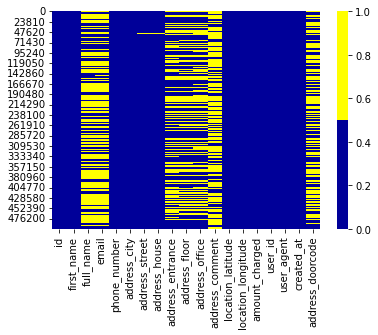

In [5]:
cols = asasa.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(asasa[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
www = asasa[['first_name', 'email', 'phone_number', 'address_city', 'address_street', 'address_house', 'amount_charged', 'created_at']]
www.head()

first_name                    email  phone_number    address_city  \
0         Марина                      NaN   79645120329          Москва   
1      Sergey B.                      NaN   79645120404          Москва   
2     Елизавета                       NaN   79645120462  село Озерецкое   
3  Жанна Мкртчян  janna.janna-m@yandex.ru   79645120512          Москва   
4            Яна                      NaN   79645120572          Москва   

                 address_street address_house  amount_charged  \
0             Хабаровская улица           6к2            1359   
1               Чусовская улица          11к8               0   
2                Иверская улица            12             934   
3            Ленинский проспект          77к2            1104   
4  Большая Калитниковская улица           42А             485   

           created_at  
0 2021-12-25 22:00:00  
1 2021-09-30 20:09:00  
2 2021-06-30 20:43:00  
3 2021-10-24 15:35:00  
4 2021-07-11 10:39:00

In [7]:
www.rename(columns = {'first_name':'Имя', 
'phone_number':'Номер телефона', 
'address_city':'Город', 'address_street':'Улица', 
'address_house':'Дом', 
'amount_charged':'Цена', 
'created_at':'Дата'}, inplace=True)
www

C:\Users\Chern\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Имя                    email  Номер телефона  \
0              Марина                      NaN     79645120329   
1           Sergey B.                      NaN     79645120404   
2          Елизавета                       NaN     79645120462   
3       Жанна Мкртчян  janna.janna-m@yandex.ru     79645120512   
4                 Яна                      NaN     79645120572   
...               ...                      ...             ...   
499995         Сергей                      NaN     79851360133   
499996          Ivana  stanic.ivana@icloud.com     79851360136   
499997          Ivana  stanic.ivana@icloud.com     79851360136   
499998         Ivana   stanic.ivana@icloud.com     79851360136   
499999          Ivana  stanic.ivana@icloud.com     79851360136   

                 Город                         Улица     Дом  Цена  \
0               Москва             Хабаровская улица     6к2  1359   
1               Москва               Чусовская улица    11к8     0   
2       село Озерецкое                Иверская улица      12   934   
3               Москва            Ленинский проспект    77к2  1104   
4               Москва  Большая Калитниковская улица     42А   485   
...                ...                           ...     ...   ...   
499995          Москва           улица Константинова      28   383   
499996          Москва   Большой Кисловский переулок   5-7с2  1999   
499997          Москва   Большой Кисловский переулок     4с1  1659   
499998          Москва       Большая Никитская улица  14/2с7   979   
499999          Москва   Большой Кисловский переулок   5-7с1  1208   

                      Дата  
0      2021-12-25 22:00:00  
1      2021-09-30 20:09:00  
2      2021-06-30 20:43:00  
3      2021-10-24 15:35:00  
4      2021-07-11 10:39:00  
...                    ...  
499995 2021-07-05 16:26:00  
499996 2021-06-21 16:40:00  
499997 2021-06-29 23:34:00  
499998 2021-11-02 15:31:00  
499999 2022-01-20 18:37:00  

[500000 rows x 8 columns]

In [8]:
www.sort_values(by = ['Цена'], ascending = False)

Имя               email  Номер телефона            Город  \
62305            лев       lev@koove.com     79652308606           Москва   
100831        Иосиф                  NaN     79654400656           Москва   
218965          Элла  ella-nazar@mail.ru     79685141505           Москва   
373500         Иосиф                 NaN     79776123022           Москва   
373503         Иосиф                 NaN     79776123022           Москва   
...              ...                 ...             ...              ...   
315594     Игорь Цой                 NaN     79772951590           Москва   
157275    константин                 NaN     79671132839           Москва   
315603  Роман Арюков  Aryukovroman@ya.ru     79772952265           Москва   
315605  Софья Исаева                 NaN     79772952281           Москва   
185974       Денис Н                 NaN     79674982460  деревня Жевнево   

                         Улица     Дом   Цена                Дата  
62305      Турчанинов переулок      2А  65929 2021-11-06 13:47:00  
100831          улица Покровка  3/7с1А  50349 2021-11-06 21:58:00  
218965        Лобненская улица    18с2  49990 2021-09-12 16:21:00  
373500       Хорошёвское шоссе    12к1  49224 2021-11-05 21:03:00  
373503             улица Арбат  54/2с1  45939 2021-10-29 17:13:00  
...                        ...     ...    ...                 ...  
315594       улица Добролюбова     3с1      0 2021-11-25 13:19:00  
157275         улица Санникова     3к2      0 2021-06-30 20:29:00  
315603  3-я улица Ямского Поля    20с1      0 2021-12-12 02:24:00  
315605      улица Саляма Адиля     9к3      0 2021-11-04 00:45:00  
185974          Северная улица     122      0 2021-07-01 15:32:00  

[500000 rows x 8 columns]

<AxesSubplot:>

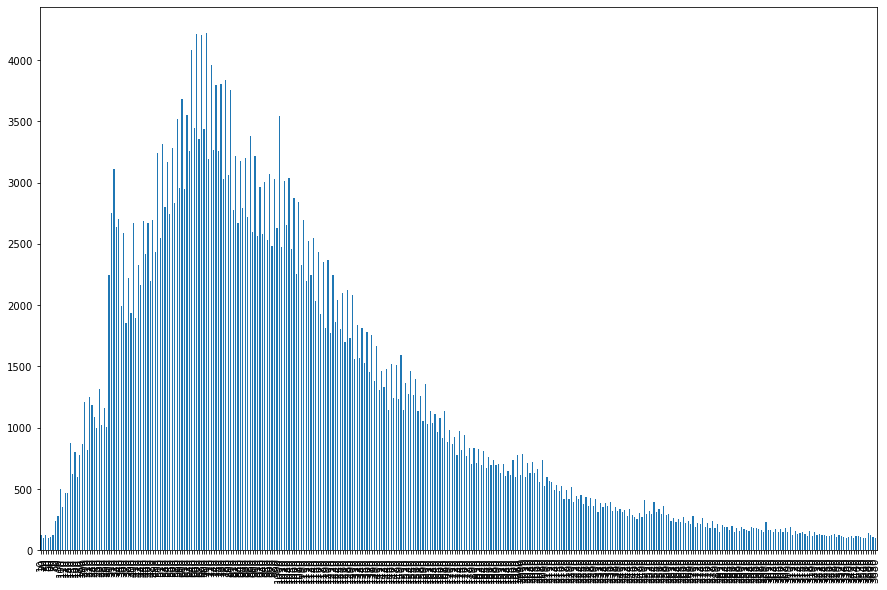

In [14]:
www['Цена'].round(-1).value_counts().sort_index(ascending=True)[www['Цена'].round(-1).value_counts() > 100][1:].plot(kind = 'bar', figsize=(15, 10))

In [12]:
www['Цена'].round(-2).value_counts()[www['Цена'].round(-2).value_counts() > 100]

0       74406
700     36635
600     33624
800     32590
1000    28684
        ...  
5900      123
5800      119
6000      118
6100      104
6200      101
Name: Цена, Length: 63, dtype: int64

In [27]:
www['Цена'].value_counts(normalize=True, bins = 500).sort_index(ascending=True)

(-65.93, 131.858]         0.153672
(131.858, 263.716]        0.024766
(263.716, 395.574]        0.055114
(395.574, 527.432]        0.067608
(527.432, 659.29]         0.087554
                            ...   
(65269.71, 65401.568]     0.000000
(65401.568, 65533.426]    0.000000
(65533.426, 65665.284]    0.000000
(65665.284, 65797.142]    0.000000
(65797.142, 65929.0]      0.000002
Name: Цена, Length: 500, dtype: float64

In [1]:
www['Город'].unique()
##www['Город'].nunique()

NameError: name 'www' is not defined

In [13]:
www['Город'] = www['Город'].str.lower()
www['Город'] = www['Город'].str.strip()
www['Город'] = www['Город'].str.replace('\\.', '') 
www['Город'] = www['Город'].str.replace('\\bсадоводческое некоммерческое товарищество\\b', '') 
www['Город'] = www['Город'].str.replace('\\bкоттеджный посёлок \\b', '') 
www['Город'] = www['Город'].str.replace('\\bсадовое товарищество \\b', '') 
www['Город'] = www['Город'].str.replace('\\bдеревня \\b', '') 
www['Город'] = www['Город'].str.replace('\\bснт \\b', '')
www['Город'] = www['Город'].str.replace('\\bпосёлок \\b', '')
www['Город'] = www['Город'].str.replace('\\bдск \\b', '')
www['Город'] = www['Город'].str.replace('\\bпоселение \\b', '')
www['Город'] = www['Город'].str.replace('\\bмосква, \\b', '')
www['Город'] = www['Город'].str.replace('\\bрабочий \\b', '')
www['Город'] = www['Город'].str.replace('\\bсело \\b', '')

C:\Users\Chern\AppData\Local\Temp/ipykernel_4476/1334618537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  www['Город'] = www['Город'].str.lower()
C:\Users\Chern\AppData\Local\Temp/ipykernel_4476/1334618537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  www['Город'] = www['Город'].str.strip()
C:\Users\Chern\AppData\Local\Temp/ipykernel_4476/1334618537.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  www['Город'] = www['Город'].str.replace('\\.',

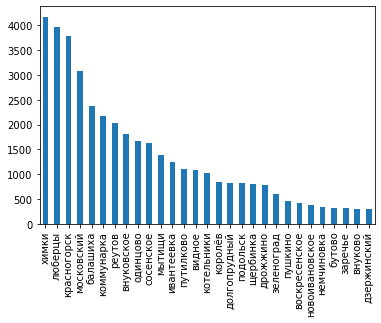

In [14]:
i=www['Город'].value_counts(dropna=False)[1:30].plot(kind='bar')

In [10]:
asasa.loc['Оля']
asasa.loc['Иван']

id     first_name                       email  phone_number  \
full_name                                                                       
Иван       493736968           Иван              zban05@mail.ru   79851124439   
Иван       505220131           Иван    pantyushin.i.v@gmail.com   79683676222   
Иван       593668617           иван          cherep1.92@mail.ru   79651995387   
Иван       494696483           иван          cherep1.92@mail.ru   79651995387   
Иван       705261282           Иван               ion88@mail.ru   79652117663   
...              ...            ...                         ...           ...   
Иван       492295988        TyIII Z        Zubarev.ivan@mail.ru   79672146473   
Иван       659799323           иван             5645590@mail.ru   79851104485   
Иван       495411716  Иван Кирсанов             796619991@ya.ru   79661999921   
Иван       639539148           Иван  vaniasuper123321@gmail.com   79850967796   
Иван       492704938           Иван        minion1905@gmail.com   79771325580   

                              address_city              address_street  \
full_name                                                                
Иван                    посёлок Коммунарка        улица Сосенский Стан   
Иван       Москва, поселение Воскресенское            Чечёрский проезд   
Иван                                Москва            улица Корнейчука   
Иван                                Москва               улица Свободы   
Иван                                Москва      Днепропетровская улица   
...                                    ...                         ...   
Иван                                Москва         Велозаводская улица   
Иван                                Москва          улица Твардовского   
Иван                                Москва  2-й Кожевнический переулок   
Иван                                Москва        улица Миклухо-Маклая   
Иван                              Балашиха              Мирской проезд   

          address_house address_entrance  address_floor address_office  \
full_name                                                                
Иван                 10                3           10.0            208   
Иван              122к2                3            5.0            153   
Иван                 42                2            NaN             49   
Иван                 79              NaN            2.0            219   
Иван               27к1                8            5.0            268   
...                 ...              ...            ...            ...   
Иван                3/2                5            3.0             51   
Иван               18к2                4           17.0            325   
Иван               12с2                4            3.0            106   
Иван               32к1                5           17.0            319   
Иван                 10                1           17.0             65   

                                             address_comment  \
full_name                                                      
Иван                                                     NaN   
Иван                 вход с противоположной от двора стороны   
Иван                                              49 домофон   
Иван       Магазин мотосток 2 этаж, вход через магазин КО...   
Иван                                                     NaN   
...                                                      ...   
Иван                    Телефон 9672146473 на всякий случай.   
Иван                                            код 325к1214   
Иван                                         ЗАО РДЦ ПАРИТЕТ   
Иван                                                     NaN   
Иван       Звонок не работает, позвоните по телефону пожа...   

           location_latitude  location_longitude  amount_charged    user_id  \
full_name                                                                     
Иван               55.565455           37.47038

In [15]:
'проверка орфографии'


from nltk.metrics import edit_distance
df_city_ex = www['Город']


df_city_ex['city_distance_toronto'] = df_city_ex.map(lambda x: edit_distance(x, 'Москва'))
df_city_ex


msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'Москва'




C:\Users\Chern\AppData\Local\Temp/ipykernel_4476/242484127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_ex['city_distance_toronto'] = df_city_ex.map(lambda x: edit_distance(x, 'Москва'))
C:\Users\Chern\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\Chern\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

TypeError: unhashable type: 'Series'

In [ ]:
bn = www[asasa["email"].notna()]
bn.head()

In [ ]:
bn[(bn['Цена'] >= 10000)]

In [ ]:
bn[(bn['Город'] != 'москва')]

In [ ]:
bn.boxplot(column=['Цена'], figsize=(15, 10), showfliers=False)

In [ ]:
pd.pivot_table(bn, 'Цена', 'Имя')

In [ ]:
bn['Цена'].sum()

In [ ]:
bn['Цена'].describe()

In [ ]:
bn['Цена'].max()

In [ ]:
bn['Дата'] = pd.to_datetime(bn['Дата'])

In [ ]:
ryy = bn.groupby(pd.Grouper(key="Дата", freq="W")).agg({'Цена':['sum','mean']})
ryy

In [ ]:
plt.plot(ryy[3])

In [ ]:
kto = bn[(bn['Цена'] == 0) | (bn['Цена'] == 1)]
kto.head()

In [ ]:
adult_names = bn.loc[bn['Цена'] > 1000, "Имя"]
adult_names

In [ ]:
w = bn[bn['Цена'] >= 10000]
p = w[["Имя", "Цена"]].groupby("Имя").mean()
p

In [ ]:
w.plot(kind='barh', x="Имя", y="Цена")[:100]

In [ ]:
rr = beznull.loc[(beznull['address_street'] == 'Ленинский проспект') & (beznull['address_house'].str.contains("4")==True)]
rr

In [ ]:
beznull[beznull['address_house'].str.startswith("4")==True]

In [ ]:
we = asasa.groupby(['full_name']).size().reset_index(name='count')
rt = we[(we['count'] >= 30)]


In [ ]:
we = asasa.groupby(['full_name']).size().reset_index(name='count')
rt = we[(we['count'] >= 30)]

In [ ]:
rr['amount_charged'].plot

In [ ]:
beznull

In [ ]:
beznull['created_at'] = pd.to_datetime(beznull['created_at'])

In [ ]:
beznull

In [ ]:
beznull.dtypes

In [ ]:
hgg = beznull.sort_values(by='created_at', ascending=True)[:300]
hgg

In [ ]:
hgg.plot(kind='bar', x="created_at", y="amount_charged", figsize=(15, 10))

In [ ]:
ryy.plot(kind='bar', y="amount_charged", figsize=(15, 10))

In [ ]:
beznull.dtypes

In [ ]:
iii = pd.pivot_table(beznull, index=["full_name", 'address_street'],
               values=["amount_charged"], aggfunc=[np.mean, len], fill_value=0)
iii

In [ ]:
ax = iii.plot(kind='barh', stacked=True)
ax

In [ ]:
cut_labels_4 = ['0-500', '500-1000', '1000-2000', '2000+']
cut_bins = [0, 500, 1000, 2000, 200000]
beznull['amount_charged12'] = pd.cut(beznull['amount_charged'],
                       bins=cut_bins,
                       labels=cut_labels_4)
beznull.head()



In [ ]:
beznull['amount_charged12'].value_counts()

In [ ]:
beznull['amount_charged12'].value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
rff = pd.cut(beznull['amount_charged'],
       bins=np.linspace(0, 3000, 101)).value_counts()
rff.dtypes

In [ ]:
rff.value_counts().plot(kind='bar', y="amount_charged12", figsize=(15, 10))

In [ ]:
beznull['amount_charged'] = round(beznull['amount_charged'], -2)

In [ ]:
edd = beznull.groupby(['amount_charged']).size().reset_index(name='count')
edd = edd[(edd['count'] >= 20)]

In [ ]:
edd.plot(kind='bar', y="count", figsize=(15, 10))
